In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
print(f"Original Training shape: {train_images.shape}")

Original Training shape: (60000, 28, 28)


In [3]:
# As we know that convolution require 3D vectors so we will include 
# the greyscale channel
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Normalization
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

print(f"Reshaped training shape:{train_images.shape}")

Reshaped training shape:(60000, 28, 28, 1)


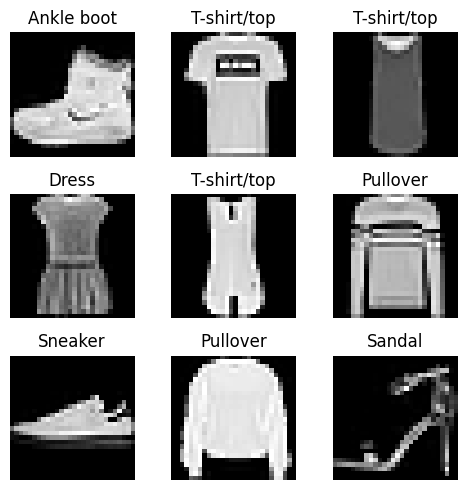

In [32]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(train_images[i,:,:,0], cmap='gray')
    plt.title(class_names[train_labels[i]]) 
    plt.axis('off')
plt.tight_layout()
plt.show()


In [5]:
model = keras.Sequential([
    keras.layers.Input(shape=(28,28,1)),
    
    keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)               │ (None, 28, 28, 32)    │          320 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ batch_normalization           │ (None, 28, 28, 32)    │          128 │
│ (BatchNormalization)          │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 14, 14, 32)    │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_1 (Conv2D)             │ (None, 14, 14, 64)    │       18,496 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ batch_normalization_1         │ (None, 14, 14, 64)    │          256 │
│ (BatchNormalization)          │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_1               │ (None, 7, 7, 64)      │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_2 (Conv2D)             │ (None, 7, 7, 64)      │       36,928 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ batch_normalization_2         │ (None, 7, 7, 64)      │          256 │
│ (BatchNormalization)          │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_2               │ (None, 3, 3, 64)      │            0 │
│ (MaxPooling2D)                │                       │              │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 56,384 (220.25 KB)

 Trainable params: 56,064 (219.00 KB)

 Non-trainable params: 320 (1.25 KB)

In [6]:
# Visualising the features of each convolutional layers
conv_layer_outputs = [layer.output for layer in model.layers if isinstance(layer, keras.layers.Conv2D)]

activation_model = keras.models.Model(inputs=model.inputs, outputs=conv_layer_outputs)
img_tensor = train_images[0:1]

activations = activation_model.predict(img_tensor)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


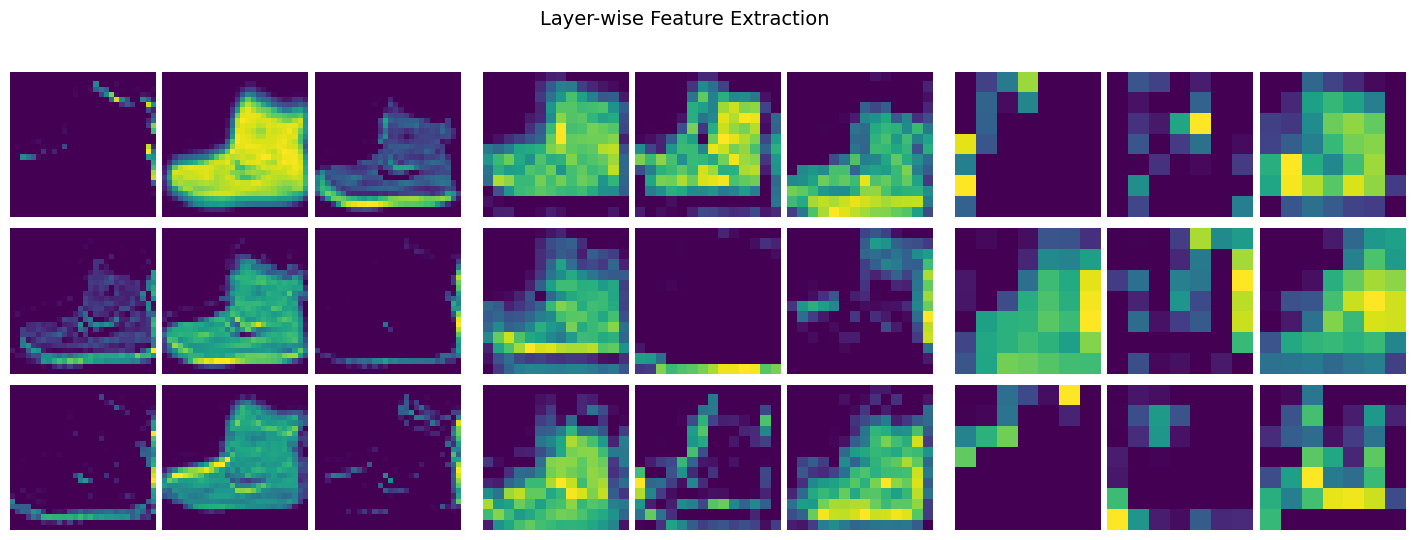

In [29]:
import matplotlib.gridspec as gridspec

def visualize_layers_side_by_side(activations, grid_size=(3,3)):
    n_layers = len(activations)
    n_rows, n_cols = grid_size

    fig = plt.figure(figsize=(n_layers*n_cols*2, n_rows*2))
    fig.suptitle("Layer-wise Feature Extraction", fontsize=14)

    outer = gridspec.GridSpec(1, n_layers, wspace=0.05, hspace=0.05)

    for layer_idx, activation in enumerate(activations):
        inner = gridspec.GridSpecFromSubplotSpec(n_rows, n_cols, subplot_spec=outer[layer_idx], wspace=0.05, hspace=0.05)
        for idx in range(n_rows*n_cols):
            ax = fig.add_subplot(inner[idx])
            if idx < activation.shape[-1]:
                ax.imshow(activation[0, :, :, idx], cmap='viridis')
            ax.axis('off')

    plt.show()
visualize_layers_side_by_side([activations[0], activations[1], activations[2]], grid_size=(3,3))

In [9]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
keras.layers.Dropout(0.5)
model.add(keras.layers.Dense(10, activation='softmax'))
print("Updated Architecture:")
model.summary()

Updated Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)               │ (None, 28, 28, 32)    │          320 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ batch_normalization           │ (None, 28, 28, 32)    │          128 │
│ (BatchNormalization)          │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 14, 14, 32)    │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_1 (Conv2D)             │ (None, 14, 14, 64)    │       18,496 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ batch_normalization_1         │ (None, 14, 14, 64)    │          256 │
│ (BatchNormalization)          │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_1               │ (None, 7, 7, 64)      │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_2 (Conv2D)             │ (None, 7, 7, 64)      │       36,928 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ batch_normalization_2         │ (None, 7, 7, 64)      │          256 │
│ (BatchNormalization)          │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_2               │ (None, 3, 3, 64)      │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten (Flatten)             │ (None, 576)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense (Dense)                 │ (None, 128)           │       73,856 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)               │ (None, 10)            │        1,290 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 131,530 (513.79 KB)

 Trainable params: 131,210 (512.54 KB)

 Non-trainable params: 320 (1.25 KB)

In [10]:
from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau

early_stopping = EarlyStopping(
    monitor='val_loss',        
    patience=5,               
    restore_best_weights=True  
)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                 patience=2, 
                                 factor=0.2, 
                                 min_lr=0.00001)

In [11]:
model.compile(optimizer='adam' ,loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
print("Starting the Training Sequence....")
history = model.fit(train_images,
                    train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,callbacks=[early_stopping,lr_reduction])

Starting the Training Sequence....
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 23s 57ms/step - accuracy: 0.8529 - loss: 0.4104 - val_accuracy: 0.5890 - val_loss: 1.2191 - learning_rate: 0.0010
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.9018 - loss: 0.2682 - val_accuracy: 0.9007 - val_loss: 0.2720 - learning_rate: 0.0010
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.9167 - loss: 0.2243 - val_accuracy: 0.8941 - val_loss: 0.2861 - learning_rate: 0.0010
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.9274 - loss: 0.1943 - val_accuracy: 0.9050 - val_loss: 0.2652 - learning_rate: 0.0010
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.9373 - loss: 0.1691 - val_accuracy: 0.9115 - val_loss: 0.2457 - learning_rate: 0.0010
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.9455 - loss: 0.1469 - val_accuracy: 0.9082 - val_loss: 0.2662 - learning_rate: 0.0010
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2

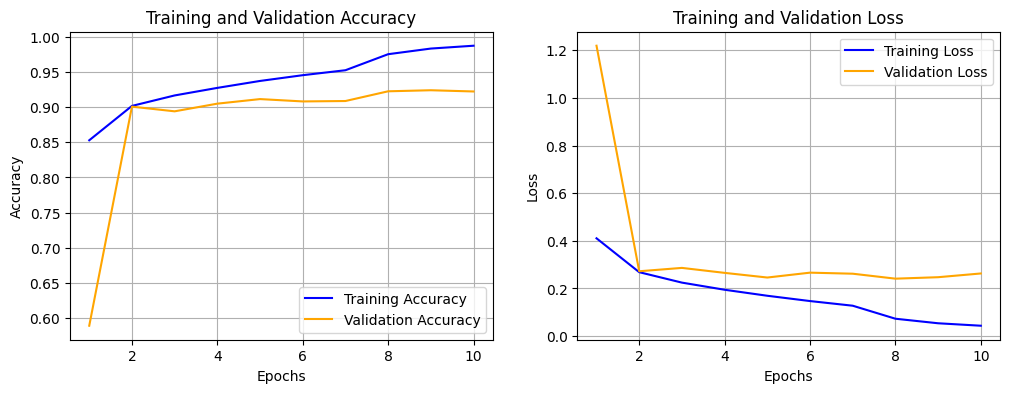

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', color='blue')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='orange')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', color='blue')
plt.plot(epochs_range, val_loss, label='Validation Loss', color='orange')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)

plt.show()

In [13]:
print("\nInitiating Final Evaluation on Test Set...")
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print(f"\nDefinitive Test Accuracy: {test_acc:.4f} ({test_acc * 100:.2f}%)")
print(f"Definitive Test Loss: {test_loss:.4f}")


Initiating Final Evaluation on Test Set...
313/313 - 1s - 4ms/step - accuracy: 0.9175 - loss: 0.2372

Definitive Test Accuracy: 0.9175 (91.75%)
Definitive Test Loss: 0.2372
